In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

/Users/miqbaltawakal/miniconda3/envs/lingkungan_tidak_sehat/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


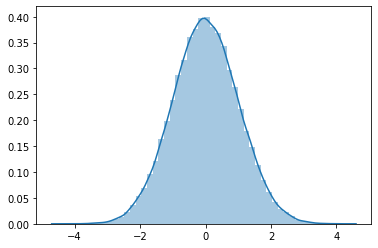

In [2]:
n1 = tfd.Normal(0, 1)
sns.distplot(n1.sample(100000))

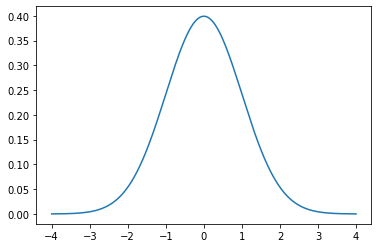

In [3]:
xs = np.linspace(-4, 4, 1000)
ys = n1.prob(xs)

fig, ax = plt.subplots()
sns.lineplot(xs, ys, ax=ax)

In [4]:
# samples = np.array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

samples = [1, 1, 1, 1, 0, 1, 1, 0, 0, 1]

# Insert sample result here!

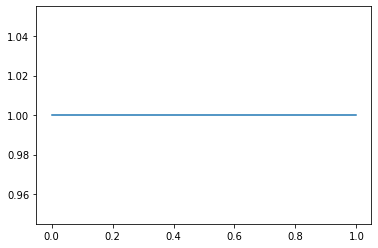

In [5]:
xs = np.linspace(0, 1, 1000)
bt = tfd.Beta(1, 1)

ys = bt.prob(xs)

plt.plot(xs, ys)

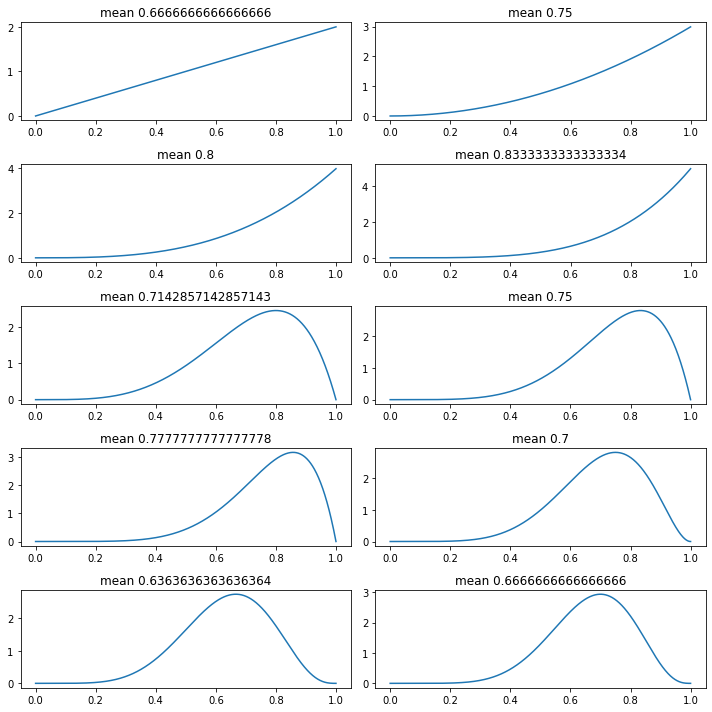

In [6]:
# analytical solution
prior_alpha = 1
prior_beta = 1
beta = tfd.Beta(prior_alpha, prior_beta)

fig, axes = plt.subplots(5, 2, figsize=(10, 10))

for s, ax in zip(samples, axes.reshape(-1)):
    if s == 1:
        prior_alpha += 1
    else:
        prior_beta += 1
        
    beta = tfd.Beta(prior_alpha, prior_beta)
    
    xs = np.linspace(0, 1, 1000)
    ys = beta.prob(xs)
    ax.plot(xs, ys)
    ax.set_title('mean {}'.format((prior_alpha/(prior_alpha+prior_beta))))

plt.tight_layout()

In [7]:
# approximate solution
def joint_log_prob(p, data):
    
    rv_observation = tfd.Bernoulli(p)
    return tf.reduce_sum(rv_observation.log_prob(data))

In [8]:
def log_posterior(p):
    return joint_log_prob(p, samples)

In [9]:
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
  target_log_prob_fn=log_posterior,
  step_size=np.float64(.7),
  num_leapfrog_steps=2)

In [10]:
samples, kernel_results = tfp.mcmc.sample_chain(
    num_results=10000,
    num_burnin_steps=5000,
    current_state=np.zeros(1),
    kernel=hmc_kernel,
    trace_fn=lambda current_state, kernel_results: kernel_results)

W0911 18:11:49.652939 4453709248 deprecation.py:323] From /Users/miqbaltawakal/miniconda3/envs/lingkungan_tidak_sehat/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


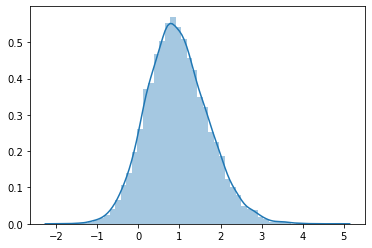

In [11]:
sns.distplot(samples)

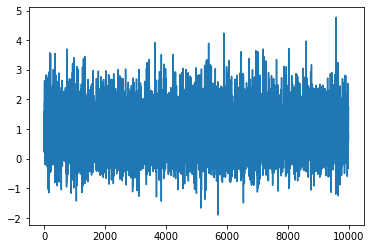

In [12]:
plt.plot(samples)